##### Import standard libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Import the package MultiNetX

In [37]:
import multinetx as mx

##### Create three Erd"os- R'enyi networks with N nodes for each layer

In [38]:
N = 50
g1 = mx.erdos_renyi_graph(N,0.07,seed=218)
g2 = mx.erdos_renyi_graph(N,0.07,seed=211)
g3 = mx.erdos_renyi_graph(N,0.07,seed=208)

### Edge colored nertwork (no inter-connected layers)

##### Create the multiplex network

In [39]:
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3])

##### Set weights to the edges

In [40]:
mg.set_intra_edges_weights(layer=0,weight=1)
mg.set_intra_edges_weights(layer=1,weight=2)
mg.set_intra_edges_weights(layer=2,weight=3)

##### Plot the adjacency matrix and the multiplex networks

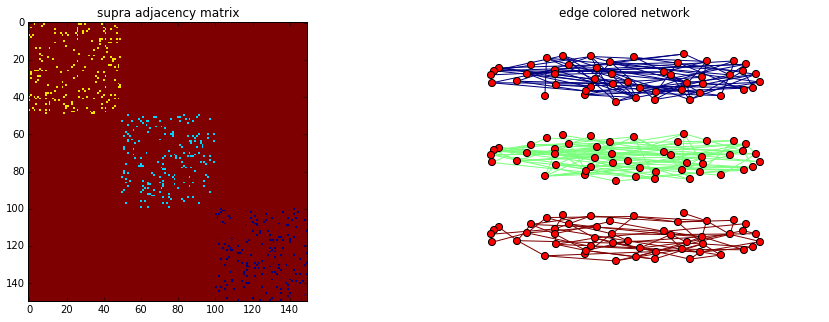

In [41]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.imshow(mx.adjacency_matrix(mg,weight='weight').todense(),
          origin='upper',interpolation='nearest',cmap=plt.cm.jet_r)
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('edge colored network')
pos = mx.get_position(mg,mx.fruchterman_reingold_layout(g1),
                      layer_vertical_shift=0.2,
                      layer_horizontal_shift=0.0,
                      proj_angle=47)
mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
                 edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
                 edge_cmap=plt.cm.jet_r)
plt.show()

### Regular interconnected multiplex

##### Define the type of interconnection between the layers

In [42]:
adj_block = mx.lil_matrix(np.zeros((N*3,N*3)))

adj_block[0:  N,  N:2*N] = np.identity(N)    # L_12
adj_block[0:  N,2*N:3*N] = np.identity(N)    # L_13
#adj_block[N:2*N,2*N:3*N] = np.identity(N)    # L_23
adj_block += adj_block.T

##### Create an instance of the MultilayerGraph class

In [43]:
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3], 
                        inter_adjacency_matrix=adj_block)

mg.set_edges_weights(inter_layer_edges_weight=4)

mg.set_intra_edges_weights(layer=0,weight=1)
mg.set_intra_edges_weights(layer=1,weight=2)
mg.set_intra_edges_weights(layer=2,weight=3)

##### Plot the adjacency matrix and the multiplex networks

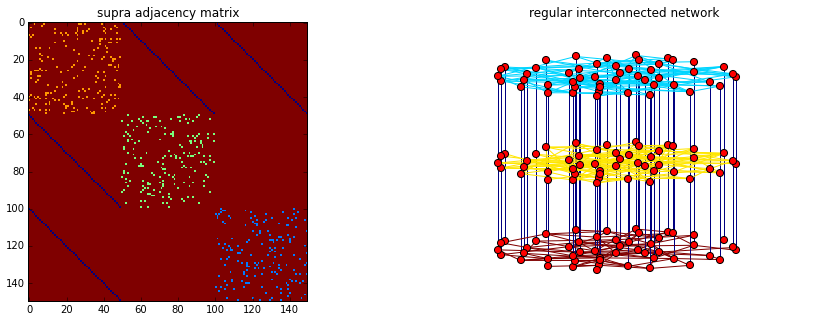

In [44]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.imshow(mx.adjacency_matrix(mg,weight='weight').todense(),
          origin='upper',interpolation='nearest',cmap=plt.cm.jet_r)
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('regular interconnected network')
pos = mx.get_position(mg,mx.fruchterman_reingold_layout(mg.get_layer(0)),
                      layer_vertical_shift=1.4,
                      layer_horizontal_shift=0.0,
                      proj_angle=7)
mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
                 edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
                 edge_cmap=plt.cm.jet_r)
plt.show()

### General multiplex multiplex

##### Define the type of interconnection between the layers

In [45]:
adj_block = mx.lil_matrix(np.zeros((N*4,N*4)))

adj_block[0  :  N ,   N:2*N] = np.identity(N)   # L_12
adj_block[0  :  N , 2*N:3*N] = np.random.poisson(0.005,size=(N,N))   # L_13
adj_block[0  :  N , 3*N:4*N] = np.random.poisson(0.006,size=(N,N))   # L_34
adj_block[3*N:4*N , 2*N:3*N] = np.random.poisson(0.008,size=(N,N))   # L_14
adj_block += adj_block.T
adj_block[adj_block>1] = 1

##### Create an instance of the MultilayerGraph class

In [46]:
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3,g1],
                        inter_adjacency_matrix=adj_block)

mg.set_edges_weights(inter_layer_edges_weight=5)

mg.set_intra_edges_weights(layer=0,weight=1)
mg.set_intra_edges_weights(layer=1,weight=2)
mg.set_intra_edges_weights(layer=2,weight=3)
mg.set_intra_edges_weights(layer=3,weight=4)

##### Plot the adjacency matrix and the multiplex networks

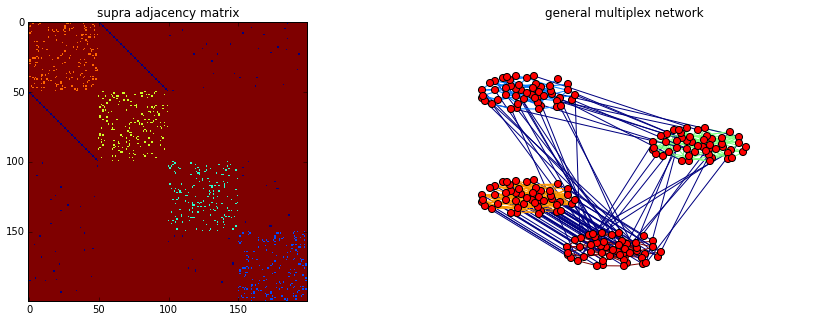

In [47]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.imshow(mx.adjacency_matrix(mg,weight='weight').todense(),
          origin='upper',interpolation='nearest',cmap=plt.cm.jet_r)
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('general multiplex network')
pos = mx.get_position(mg,mx.fruchterman_reingold_layout(mg.get_layer(0)),
                      layer_vertical_shift=.3,
                      layer_horizontal_shift=0.9,
                      proj_angle=.2)
mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
                 edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
                 edge_cmap=plt.cm.jet_r)
plt.show()